<a href="https://colab.research.google.com/github/ashishxjha/BBN/blob/main/Serpico_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
df=pd.read_csv('/content/drive/MyDrive/CSV_Files/SM_Thermo.csv')
df.head()

,t (s),T_gam (MeV),T_gam/T_nu,g*,gs,a,z_gam,z_nu,N
0,0.007387,10.000000,1.000000,10.736124,10.735804,0.051101,1.000024,1.000024,0.000407
1,0.007524,9.908319,1.000000,10.736112,10.735786,0.051574,1.000025,1.000024,0.000414
2,0.007664,9.817479,1.000000,10.736099,10.735768,0.052051,1.000025,1.000025,0.000421
3,0.007806,9.727472,1.000001,10.736086,10.735749,0.052533,1.000026,1.000025,0.000429
4,0.007952,9.638290,1.000001,10.736073,10.735729,0.053019,1.000026,1.000026,0.000437


In [64]:
z_gam=df["z_gam"]
z_nu=df["z_nu"]
gs=df["gs"]
g=df["g*"]
m_e=0.511
z_g=m_e/df["T_gam (MeV)"]

In [65]:
cons=4.8/m_e**(2)

In [66]:

def gprime_s(df):
    x=[]
    for i in range(0,1000,1):
        if(z_g[i+1]!=z_g[i]):
            x.append((df["gs"][i+1]-df["gs"][i])/(z_g[i+1]-z_g[i]))
        else:
            x.append(x[i-1])
    return x

In [67]:
gprime_list=gprime_s(df)
gprime_list.append(0)

In [68]:
func=cons*(-(z_g**(2))*1/3*np.divide(gprime_list,df['gs'])+z_g)/(np.sqrt(df['g*']))
print(func)

0          0.286697
1          0.289350
2          0.292028
3          0.294731
4          0.297458
           ...     
996     4922.164196
997     4967.708336
998     5013.673925
999     5060.064869
1000    5106.885143
Length: 1001, dtype: float64


In [69]:
from scipy import interpolate
dt_dz=interpolate.interp1d(z_g,func)
x_new=np.linspace(min(z_g),max(z_g),100000)
dtdz_new=dt_dz(x_new)

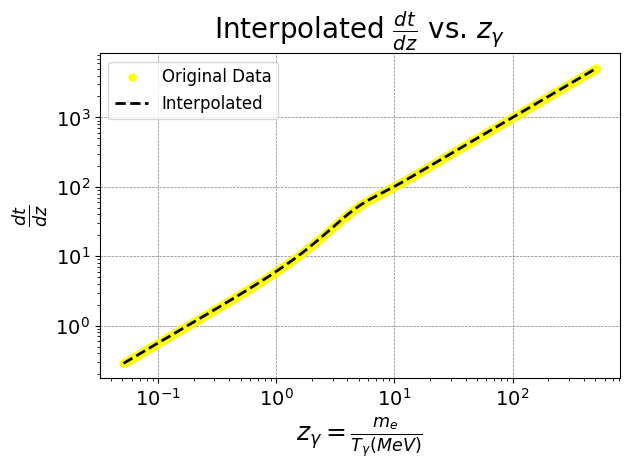

In [70]:
plt.plot(z_g,func, 'o', color='yellow', markersize=5, label='Original Data')
plt.plot(x_new, dtdz_new, '--', color='black', linewidth=2, label='Interpolated')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$z_{\gamma}=\frac{m_e}{T_\gamma(MeV)}$', fontsize=18)
plt.ylabel(r'$\frac{dt}{dz}$', fontsize=18)
plt.title(r'Interpolated $\frac{dt}{dz}$ vs. $z_{\gamma}$', fontsize=20)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

In [71]:
z_int=np.sort(z_g)

In [72]:
znu = []
for x in z_int:
    if m_e/x >= 0.01:
        znu.append(x)

In [73]:
a_0 = 1
a_1 = 0.15735
a_2 = 4.6172
a_3 = -0.40520e2
a_4 = 0.13875e3
a_5 = -0.59898e2
a_6 = 0.66752e2
a_7 = -0.16705e2
a_8 = 3.8071
a_9 = -0.39140
a_10 = 0.023590
a_11 = -0.83696e-4
a_12 = -0.42095e-4
a_13 = 0.17675e-5
q_np = 0.33979

b_0 = -0.62173
b_1 = 0.22211e2
b_2 = -0.72798e2
b_3 = 0.11571e3
b_4 = -0.11763e2
b_5 = 0.45521e2
b_6 = -3.7973
b_7 = 0.41266
b_8 = -0.026210
b_9 = 0.87934e-3
b_10 = -0.12016e-4
q_pn = 2.8602
tau=8.7945e2
m_e=0.511

a_values = [a_1, a_2, a_3, a_4, a_5, a_6, a_7, a_8, a_9, a_10, a_11, a_12, a_13]
b_values = [b_1, b_2, b_3, b_4, b_5, b_6, b_7, b_8, b_9, b_10]

In [74]:
# Define the weak rate function for n <--> p
def lambda_np(z):
  f1 = 1.0
  for ie in range(1, 14):
    f1 += a_values[ie - 1] / z ** ie
  f1 *= np.exp(-0.33979 / z) / tau
  return f1
# Define the weak rate function for p <--> n
"""
def lambda_pn(z):
    value = 0
    e = (1 / z) * m_e
    if (e <= 0.1 or e <= 10):
        for i in range(1, 11):
            value += b_values[i] * z ** (-i)
        weak_rate = (value * np.exp(-q_pn * z)) / tau
    elif (e >=0.01 or e < 0.1):
        weak_rate = 0
    return weak_rate
"""

def lambda_pn(z):
  r1 = -0.62173
  e=m_e/z
  #k = (1 / z) * m_e
  #e=float("{:.2f}".format(k))
  if (e>= 0.1):
    for ie in range(1, 11):
      r1 += b_values[ie - 1] / z ** ie
    r1 *= np.exp(-2.8602 * z) / tau
    weak_rate=r1
  else :
    weak_rate = 0
  return weak_rate

In [75]:
def mev_to_t9kelvin(mev):
    temp9_kelvin=(mev*11604525006.1598)/10**(9)
    return temp9_kelvin

In [76]:
float(m_e/min(znu))

10.0

In [77]:


def n2_p(z,xn,xp):
    return (lambda_pn(z)*xp-lambda_np(z)*xn)*dt_dz(z)


def p2_n(z,xn,xp):
    return (lambda_np(z)*xn-lambda_pn(z)*xp)*dt_dz(z)
"""
def xd_dot(z, xn, xp, xd):
    value = ((pn_gammaD(z) * xp * xn - gammaD_pn(z) * xd))*dt_dz(z)
    return value
"""

'\ndef xd_dot(z, xn, xp, xd):\n    value = ((pn_gammaD(z) * xp * xn - gammaD_pn(z) * xd))*dt_dz(z)\n    return value\n'

In [78]:

def dSdz(z,S):
    xn,xp=S
    return[n2_p(z,xn,xp),p2_n(z,xn,xp)]
xn_0=0.46771996026
xp_0=0.53228003974
xd_0=1.0963027712448095e-12
S_0=(xn_0,xp_0)


In [79]:
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid
from scipy.integrate import solve_ivp

In [80]:

sol_coupled_np=solve_ivp(dSdz,t_span=(min(znu),max(znu)),y0=S_0,method="LSODA")



In [81]:

xn,xp=sol_coupled_np.y
z_val=sol_coupled_np.t

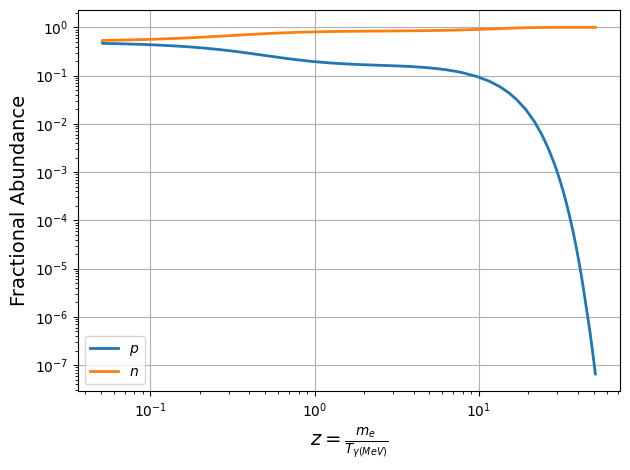

In [82]:
plt.plot(z_val,xn,linewidth=2,label=r'$p$')
plt.plot(z_val,xp,linewidth=2,label=r'$n$')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$z=\frac{m_e}{T_{\gamma(MeV)}}$',fontsize=14)
plt.ylabel('Fractional Abundance',fontsize=14)
plt.tight_layout()
plt.grid('True')
plt.legend()

In [83]:
mev_to_t9kelvin(0.511*10)

59.29912278147658

In [84]:
import math

def pn_gammaD_cyburt(z):
  T=m_e/z
  t9=mev_to_t9kelvin(T)
  NA=6.022e23
  nb=6.14e-10*410.73*(T/(2.7255))**(3)
  result=4.40654e4 * (1 + 0.0457518 * t9**(0.5) - 2.47101 * t9 + 4.17185 * t9**(3/2) - 3.44553 * t9 * t9
                        + 1.72766 * t9 * t9**(3/2) - 0.546196 * t9**(3) + 0.106066*t9**(1/2)*t9**(3) - 0.0115306*t9**(4)
                         + 0.536436e-3 * t9**(1/2)*t9**4)
  return (result/NA)

def pn_gammaD_serpico(z):
  T=m_e/z
  NA=6.022e23
  T_9=mev_to_t9kelvin(T)
  nb=6.14e-10*410.73*(T/(2.7255))**(3)
  if T_9<10:
    na_sigma_v=44060 * (1 + 0.106597 * np.sqrt(T_9) - 2.75037 * T_9 + 4.62949 * T_9**(3/2) - 3.52204 * T_9**2 + 1.34596 * T_9**(5/2) - 0.209351 * T_9**3)
  else:
    na_sigma_v=44060 * (1 + 0.106597 * np.sqrt(T_9) - 2.75037 * T_9 + 4.62949 * T_9**(3/2) - 3.52204 * T_9**2 + 1.34596 * T_9**(5/2) - 0.209351 * T_9**3)
  rate=(na_sigma_v/NA)
  return (rate)

def pn_gD_andlo(z):
  T=m_e/z
  T_9=mev_to_t9kelvin(T)
  rhob=2.12e-4*T_9**(3)
  nb=6.14e-10*410.73*(T/(2.7255))**(3)
  NA=6.022e23
  if T_9 <= 1.5:
    f =(44216. * (1 + 3.75191 * T_9 + 1.92934 * T_9**2 + 0.746503 * T_9**3 + 0.0197023 * T_9**4 + 3.00491e-6 * T_9**5) /   (1 + 5.4678 * T_9 + 5.62395 * T_9**2 + 0.489312 * T_9**3 + 0.00747806 * T_9**4))
  else:
    f = (1. - np.sqrt(T_9) * 0.8504 + T_9 * 0.4895 - T_9**(3/2) * 0.09623 + T_9 * 0.008471 * T_9 - T_9 * 2.8e-4 * T_9**(3/2)) * 47420

  return (f/NA)



In [96]:
import math


def DD_n3He_cyburt(z):
  T=m_e/z
  t9=mev_to_t9kelvin(T)
  NA=6.022e23
  nb=6.14e-10*410.73*(T/(2.7255))**(3)
  cross_section = (1 - 9.59015 * t9 ** (1/3) + 65.2448 * t9 ** (2/3) - 247.756 * t9 +
                    596.231 * t9 ** (4/3) - 941.064 * t9 ** (5/3) + 980.076 * t9 * t9 -
                    643.032 * t9 * t9 ** (4/3) + 211.982 * t9 * t9 ** (5/3) +
                    29.0491 * t9 ** (3) - 66.1847 * t9 ** (1/3) * t9 ** (3) +
                    31.6452 * t9 ** (2/3) * t9 ** (3) - 7.15147 * t9 ** 4 +
                    0.372749 * t9 ** (1/3) * t9 ** (4) + 0.208645 * t9 ** (2/3) * t9 ** 4 -
                    0.0545129 * t9 ** (5) + 0.00536216 * t9 ** (1/3)*t9**(1/5) -
                    0.000157984 * t9 ** (2/3) * t9 ** 5 - 0.457514e-5 * t9 ** (6) +
                    2.123592e-9 * t9 ** (1/3) * t9 ** 6)

  cross_section *= 1.00749 * 1e9 * t9 ** (-2/3) * math.exp(-4.2586 / t9 ** (1/3))
  return (cross_section/NA)

def DD_n3He_serpico(z):
  T=m_e/z
  T_9=mev_to_t9kelvin(T)
  NA=6.022e23
  rate=(T_9**(-2/3)) * math.exp(-T_9**(-1/3)) * (
        -1.84664e6 + 1.22986e7 * T_9**(1/3) - 1.3761e7 * T_9**(2/3) - 6.11628e7 * T_9
        + 1.3329e8 * T_9**(4/3) - 1.24333e7 * T_9**(5/3) - 2.72404e7 * T_9**2
        + 8.52947e6 * T_9**(7/3) + 2.2519e6 * T_9**(8/3) - 2.31204e6 * T_9**3
        - 294342 * T_9**(10/3) + 911550 * T_9**(11/3) - 252211 * T_9**4
    )

  return (rate/NA)

def DD_p3H_cyburt(z):
  T=m_e/z
  T_9=mev_to_t9kelvin(T)
  rhob=2.12e-4*T_9**(3)
  t9=mev_to_t9kelvin(np.divide(z,m_e))
  NA=6.022e23
  t913 = t9 ** (1/3)
  t923 = t9 ** (2/3)
  t943 = t9 ** (4/3)
  t953 = t9 ** (5/3)

  rate = 3.91889e8*t9**(-2/3) * math.exp(-4.2586/t913)*(
      1 + 0.309233*t913 - 0.337260*t923 +
      2.51922*t9 - 2.79097*t943 + 2.16082*t953 -
      0.976181*t9*t9 + 0.210883*t943 * t9 -
      0.0169027 * t953 * t9 + 7.845538 * 10 ** (-6) * t9 ** 3
  )
  return (rate/NA)

  """
  return 2.12e-4*T_9**(3)*(T_9**(-2/3)) * math.exp(-1.06765 * T_9**(-1/3)) * (
        -5.85032e6 + 5.23171e7 * T_9**(1/3) - 1.70199e8 * T_9**(2/3) + 2.32242e8 * T_9
        - 1.18812e8 * T_9**(4/3) + 5.28874e7 * T_9**(5/3) - 9.85542e6 * T_9**2
    )
  """



In [86]:
def  DD_n3He_Alcoc(z):  #https://arxiv.org/pdf/1511.03843.pdf
    NA=6.022e23
    T9=mev_to_t9kelvin(m_e/z)
    if T9 < 0.001:
        rate = 1.142e-8
    elif 0.001 <= T9 <= 0.0015:
        rate = 1.142e-8
    elif 0.0015 < T9 <= 0.0025:
        rate = 5.470e-5
    elif 0.0025 < T9 <= 0.0035:
        rate = 3.021e-3
    elif 0.0035 < T9 <= 0.0045:
        rate = 3.732e-2
    elif 0.0045 < T9 <= 0.0055:
        rate = 2.212e-1
    elif 0.0055 < T9 <= 0.0065:
        rate = 8.546e-1
    elif 0.0065 < T9 <= 0.0075:
        rate = 2.505
    elif 0.0075 < T9 <= 0.0085:
        rate = 6.066
    elif 0.0085 < T9 <= 0.0095:
        rate = 1.278e1
    elif 0.0095 < T9 <= 0.0105:
        rate = 2.424e1
    elif 0.0105 < T9 <= 0.0115:
        rate = 4.237e1
    elif 0.0115 < T9 <= 0.0125:
        rate = 6.936e1
    elif 0.0125 < T9 <= 0.0135:
        rate = 1.077e2
    elif 0.0135 < T9 <= 0.0145:
        rate = 1.600e2
    elif 0.0145 < T9 <= 0.0155:
        rate = 2.291e2
    elif 0.0155 < T9 <= 0.0170:
        rate = 3.179e2
    elif 0.0170 < T9 <= 0.0190:
        rate = 5.667e2
    elif 0.0190 < T9 <= 0.0225:
        rate = 9.310e2
    elif 0.0225 < T9 <= 0.0275:
        rate = 2.504e3
    elif 0.0275 < T9 <= 0.0350:
        rate = 5.301e3
    elif 0.0350 < T9 <= 0.0450:
        rate = 1.568e4
    elif 0.0450 < T9 <= 0.0550:
        rate = 3.369e4
    elif 0.0550 < T9 <= 0.0650:
        rate = 6.013e4
    elif 0.0650 < T9 <= 0.0750:
        rate = 9.527e4
    elif 0.0750 < T9 <= 0.0850:
        rate = 1.390e5
    elif 0.0850 < T9 <= 0.0950:
        rate = 1.912e5
    elif 0.0950 < T9 <= 0.1050:
        rate = 2.513e5
    elif 0.1050 < T9 <= 0.1150:
        rate = 3.190e5
    elif 0.1150 < T9 <= 0.1250:
        rate = 3.938e5
    elif 0.1250 < T9 <= 0.1350:
        rate = 4.753e5
    elif 0.1350 < T9 <= 0.1450:
        rate = 5.631e5
    elif 0.1450 < T9 <= 0.1550:
        rate = 6.568e5
    elif 0.1550 < T9 <= 0.1700:
        rate = 7.559e5
    elif 0.1700 < T9 <= 0.1900:
        rate = 9.691e5
    elif 0.1900 < T9 <= 0.2250:
        rate = 1.200e6
    elif 0.2250 < T9 <= 0.2750:
        rate = 1.842e6
    elif 0.2750 < T9 <= 0.3250:
        rate = 2.555e6
    elif 0.3250 < T9 <= 0.3750:
        rate = 3.318e6
    elif 0.3750 < T9 <= 0.4250:
        rate = 4.119e6
    elif 0.4250 < T9 <= 0.4750:
        rate = 4.946e6
    elif 0.4750 < T9 <= 0.5500:
        rate = 5.792e6
    elif 0.5500 < T9 <= 0.6500:
        rate = 7.517e6
    elif 0.6500 < T9 <= 0.7500:
        rate = 9.260e6
    elif 0.7500 < T9 <= 0.8500:
        rate = 1.100e7
    elif 0.8500 < T9 <= 0.9500:
        rate = 1.272e7
    elif 0.9500 < T9 <= 1.1250:
        rate = 1.442e7
    elif 1.1250 < T9 <= 1.3750:
        rate = 1.850e7
    elif 1.3750 < T9 <= 1.6250:
        rate = 2.235e7
    elif 1.6250 < T9 <= 1.8750:
        rate = 2.595e7
    elif 1.8750 < T9 <= 2.2500:
        rate = 2.932e7
    elif 2.2500 < T9 <= 2.7500:
        rate = 3.546e7
    elif 2.7500 < T9 <= 3.2500:
        rate = 4.093e7
    elif 3.2500 < T9 <= 3.7500:
        rate = 4.585e7
    elif 3.7500 < T9 <= 4.5000:
        rate = 5.031e7
    elif 4.5000 < T9 <= 5.5000:
        rate = 5.816e7
    elif 5.5000 < T9 <= 6.5000:
        rate = 6.488e7
    elif 6.5000 < T9 <= 7.5000:
        rate = 7.072e7
    elif 7.5000 < T9 <= 8.5000:
        rate = 7.583e7
    elif 8.5000 < T9 <= 9.5000:
        rate = 8.037e7
    elif 9.5000 < T9 <= 10.0000:
        rate = 8.437e7
    else:
        rate = 0.0

    return (rate/NA)


In [97]:
z_req=np.linspace(0.0511,100,10000)


In [98]:
mev_to_t9kelvin(m_e/min(z_req))

116.045250061598

In [99]:

rate_pn=[]
rate_pn2=[]
rate_pn3=[]
for z in z_req:
  rate_pn.append(pn_gD_andlo(z))
  rate_pn2.append(pn_gammaD_cyburt(z))
  rate_pn3.append(pn_gammaD_serpico(z))

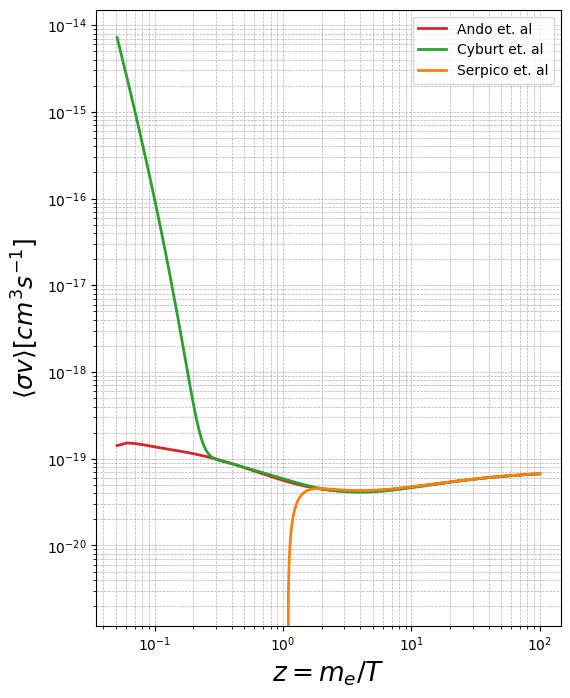

In [100]:
# Plot
plt.figure(figsize=(6, 8))  # Increase size of the plot
plt.plot(z_req, rate_pn, color='tab:red', linewidth=2, label='Ando et. al')
plt.plot(z_req, rate_pn2, color='tab:green', linewidth=2, label='Cyburt et. al')
plt.plot(z_req, rate_pn3, color='tab:orange', linewidth=2, label='Serpico et. al')

# X-axis ticks
#plt.xticks(0.1,0.5,1,5,10,50,100)

# Scale for x and y axis
plt.xscale('log')
plt.yscale('log')

# Add grid
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Set labels and title
plt.xlabel(r'$z=m_e/T$',size=19)
plt.ylabel(r'$\langle \sigma v \rangle [cm^{3}s^{-1}]$',size=18)
plt.title('')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [139]:
z_dd=np.linspace(0.5,100,1000)

In [140]:
rate_DD_n3he=[]
rate_DD_n3he2=[]
rate_DD_n3he3=[]
for z in z_dd:
  rate_DD_n3he.append(DD_n3He_Alcoc(z))
  rate_DD_n3he2.append(DD_n3He_cyburt(z))
  rate_DD_n3he3.append(DD_n3He_serpico(z))


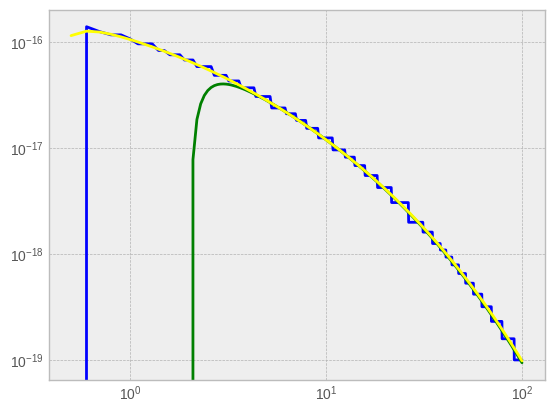

In [141]:
plt.style.use('bmh')
plt.plot(z_dd,rate_DD_n3he,color='blue')
plt.plot(z_dd,rate_DD_n3he2,color='green')
plt.plot(z_dd,rate_DD_n3he3,color='yellow')
plt.xscale('log')
plt.yscale('log')


In [ ]:
import math
# defining the rates of the following equations
def threegamma_1two(sigma_v_ab, T_9, A1,A2,A3, ga, gb, gc, Q):
    c_gamma = 9.8686*10**(9)*T_9**(3/2)*(A1*A2/A3)*(ga*gb/gc)*np.exp(-11.605*Q/T_9)
    ngamma_sigma_v_cgamma=sigma_v_ab*c_gamma

    return ngamma_sigma_v_cgamma

import math

def sigma_v_cd(sigma_v_ab,mu_ab, mu_cd, g_a, g_b, g_c, g_d, T, Q):
    cross_section_cd=sigma_v_ab*((mu_ab / mu_cd)**(3 / 2) * g_a * g_b /( g_c * g_d) * math.exp(-Q / T))
    return cross_section_cd

In [ ]:
def gammaD_pn(z):
    value1=pn_gammaD(z)
    T_9=mev_to_t9kelvin(z)
    A1=1.00727
    A2=1.00866
    A3=2.01410
    ga=2
    gb=2
    gc=3
    Q= 1.7135810198702273
    value1=value1
    rate1r=threegamma_1two(value1, T_9, A1,A2,A3, ga, gb, gc, Q)
    return rate1r

def n3He_DD(z):
    value3=DD_n3He(z)
    T=m_e/z
    mu_ab=1.00705089
    mu_cd=0.7558743049943291
    g_a=3
    g_b=3
    g_c=2
    g_d=2
    Q=4.543650748139984
    rate3r=sigma_v_cd(value3,mu_ab, mu_cd, g_a, g_b, g_c, g_d, T, Q)
    return rate3r

def p3H_DD(z):
    value4=DD_p3H(z)
    T=m_e/z
    mu_ab=1.00705089
    mu_cd=0.7550955753718033
    Q= 4.543650748139984 #correct it
    g_a=3
    g_b=3
    g_c=2
    g_d=2
    rate4r=sigma_v_cd(value4,mu_ab, mu_cd, g_a, g_b, g_c, g_d, T, Q)
    return rate4r

In [ ]:
def xp_dot(z, xn, xp,xd):

    value = (lambda_np(z) * xn - lambda_pn(z) * xp + (gammaD_pn(z) * xd - pn_gammaD(z) * xp * xn)
              + ((DD_p3H(z) * xd ** 2) / 2 ))*dt_dz(z)
    return value

def xn_dot(z, xp, xn, xd):
    value = (lambda_pn(z) * xp - lambda_np(z) * xn + (gammaD_pn(z) * xd - pn_gammaD(z) * xp * xn) +
             ((DD_n3He(z) * xd ** 2) / 2 ))*dt_dz(z)
    return value

def xd_dot(z, xp, xn, xd):
    value = ((pn_gammaD(z) * xp * xn - gammaD_pn(z) * xd) -2*(((DD_p3H(z) * xd ** 2) / 2 )+((DD_n3He(z) * xd ** 2) / 2)) )*dt_dz(z)
    return value

def x4he_dot(z,xd):
    value = ((((DD_p3H(z) * xd ** 2) / 2 )+((DD_n3He(z) * xd ** 2) / 2)))*dt_dz(z)
    return value


In [ ]:
def Xi(z_in, g_i, Ai, me, MN, eta_i, Xp, Xn, Bi,Zi):

    term1 = g_i / 2
    term2 = (zetac(3) * math.sqrt(8 / math.pi))**(Ai - 1)
    term3 = Ai**(3 / 2)
    term4 = (me / (MN * z_in))**((3 / 2) * (Ai - 1))
    term5 = eta_i**(Ai - 1)
    term6 = Xp**Zi
    term7 = Xn**(Ai - Zi)
    term8 = math.exp(Bi * z_in)

    result = term1 * term2 * term3 * term4 * term5 * term6 * term7 * term8

    return result

In [ ]:
z_iterate=[]
for i in znu:
    if mev_to_t9kelvin(np.divide(m_e,i))<10:
        z_iterate.append(i)

In [ ]:
from scipy.special import zetac, zeta
Xi(min(z_iterate), 3,2, 0.511, 1876.0409999999997,6.13832e-10,0.53228003974,0.46771996026,3.5146771037187405,1)

1.661855787923797e-14

In [ ]:
def dS3dz(z,S):
    x_p ,x_n ,x_d, x4_he =S
    return[ xp_dot(z, x_n, x_p,x_d), xn_dot(z, x_p, x_n, x_d), xd_dot(z, x_p, x_n, x_d),x4he_dot(z,x_d)]

x1_0=0.53228003974
x2_0=0.46771996026
x3_0=1.661855787923797e-12
x4_h0=0


S3_0=(x1_0,x2_0,x3_0,x4_h0)

In [ ]:
sol_coupled2=solve_ivp(dS3dz,t_span=(min(z_iterate),max(z_iterate)),y0=S3_0,method="Radau")

In [ ]:
x_n,x_p,x_d,x4_he=sol_coupled2.y


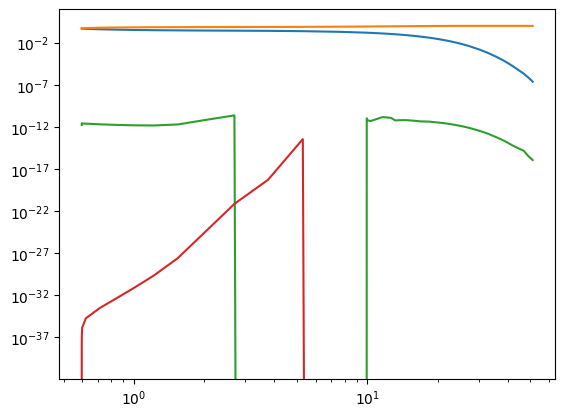

In [ ]:
 plt.plot(sol_coupled2.t,x_p)
 plt.plot(sol_coupled2.t,x_n)
 plt.plot(sol_coupled2.t,x_d)
 plt.plot(sol_coupled2.t,x4_he)
 plt.xscale('log')
 plt.yscale('log')

In [ ]:
# def f1(z, xn, xp,xd):
#     value = (lambda_pn(z) * xp - lambda_np(z) * xn + (gammaD_pn(z) * xd - pn_gammaD(z) * xp * xn))*dt_dz(z)
#     return value

# def f2(z, xp, xn, xd):
#     value = (lambda_np(z) * xn - lambda_pn(z) * xp + (gammaD_pn(z) * xd - pn_gammaD(z) * xp * xn))*dt_dz(z)
#     return value

# def f3(z, xp, xn, xd):
#     value = ((pn_gammaD(z) * xp * xn - gammaD_pn(z) * xd) )*dt_dz(z)
#     return value

In [ ]:
# # from scipy.integrate import odeint
# def dS2dz(z,S):
#     x_n,x_p,x_d=S
#     return[f1(z,x_n,x_p,x_d),f2(z,x_n,x_p,x_d),f3(z,x_n,x_p,x_d)]
# x1_0=0.46771996026
# x2_0=0.53228003974
# x3_0=1.5173291945253171e-12
# S_0=(x1_0,x2_0,x3_0)

In [ ]:
# sol_coupled=solve_ivp(dS2dz,t_span=(min(z_iterate),max(z_iterate)),y0=S_0)

NameError: ignored

In [ ]:
# xn,xp,xd=sol_coupled.y
# z_val=sol_coupled.t

NameError: ignored